In [78]:
import spacy
import en_core_web_sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import  Counter
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.stem import WordNetLemmatizer,PorterStemmer
import string

## Loading Dataset

In [14]:
df=pd.read_csv("datasets/ingestion/preprocessed/combined_faqs_raw.csv",encoding_errors="ignore")

In [15]:
df.tail() # type: ignore

,Department,Topic,Sub_Topic,question_name,question_url,question_answer
980,Office of the General Counsel and Board Secret...,Privacy,FIPPA,Q4: What are some best practices I can follow ...,https://www.torontomu.ca/gcbs/what-we-do/acces...,Take the following actions:\nReview employee ...
981,Office of the General Counsel and Board Secret...,Record Management,Record Management,Q_: My department has old records whose retent...,https://www.torontomu.ca/gcbs/what-we-do/recor...,Complete a Records Destruction Form listing t...
982,Office of the General Counsel and Board Secret...,Record Management,Record Management,Q_ : There are two different Records Classes w...,https://www.torontomu.ca/gcbs/what-we-do/recor...,Check to see if your department is identified...
983,Office of the General Counsel and Board Secret...,Privacy,FIPPA,Q17: How can I now take students' attendance a...,https://www.torontomu.ca/gcbs/what-we-do/acces...,"Attendance at lectures, seminars and labs can..."
984,Office of the General Counsel and Board Secret...,Privacy,FIPPA,Q12: Can I send multiple students one email us...,https://www.torontomu.ca/gcbs/what-we-do/acces...,A TMU students email address is considered th...


In [16]:
#combining question_name and question_answer to create a new column document
df['document']=df['question_name']+"\n"+df['question_answer']

In [17]:
df.tail() # type: ignore

,Department,Topic,Sub_Topic,question_name,question_url,question_answer,document
980,Office of the General Counsel and Board Secret...,Privacy,FIPPA,Q4: What are some best practices I can follow ...,https://www.torontomu.ca/gcbs/what-we-do/acces...,Take the following actions:\nReview employee ...,Q4: What are some best practices I can follow ...
981,Office of the General Counsel and Board Secret...,Record Management,Record Management,Q_: My department has old records whose retent...,https://www.torontomu.ca/gcbs/what-we-do/recor...,Complete a Records Destruction Form listing t...,Q_: My department has old records whose retent...
982,Office of the General Counsel and Board Secret...,Record Management,Record Management,Q_ : There are two different Records Classes w...,https://www.torontomu.ca/gcbs/what-we-do/recor...,Check to see if your department is identified...,Q_ : There are two different Records Classes w...
983,Office of the General Counsel and Board Secret...,Privacy,FIPPA,Q17: How can I now take students' attendance a...,https://www.torontomu.ca/gcbs/what-we-do/acces...,"Attendance at lectures, seminars and labs can...",Q17: How can I now take students' attendance a...
984,Office of the General Counsel and Board Secret...,Privacy,FIPPA,Q12: Can I send multiple students one email us...,https://www.torontomu.ca/gcbs/what-we-do/acces...,A TMU students email address is considered th...,Q12: Can I send multiple students one email us...


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Department       985 non-null    object
 1   Topic            985 non-null    object
 2   Sub_Topic        985 non-null    object
 3   question_name    985 non-null    object
 4   question_url     985 non-null    object
 5   question_answer  985 non-null    object
 6   document         985 non-null    object
dtypes: object(7)
memory usage: 54.0+ KB


In [19]:
df.describe()

,Department,Topic,Sub_Topic,question_name,question_url,question_answer,document
count,985,985,985,985,985,985,985
unique,31,60,91,968,925,952,981
top,Computing and Communications Services,Google Workspace,Admissions,Can I find my own preceptor?,https://www.torontomu.ca/engineering-architect...,Please see the following\n(google doc)\nGoogle...,Can I switch my placement?\nNo. Once you have ...
freq,149,139,134,3,21,3,2


In [21]:
#Saving data
df.to_csv("datasets/ingestion/preprocessed/combined_faqs_preprocessed.csv",index=False)

## Exploratory Data Analysis

In [22]:
#Loading data
df=pd.read_csv("datasets/ingestion/preprocessed/combined_faqs_preprocessed.csv")

In [23]:
df.head()

,Department,Topic,Sub_Topic,question_name,question_url,question_answer,document
0,Daphne Cockwell Scholl of Nursing,Graduate,Current Students,How do I appeal a grade?,https://www.torontomu.ca/nursing/graduate/stud...,YSGS Policies and Guidelines,How do I appeal a grade?\nYSGS Policies and Gu...
1,Future Students,Undergraduate,Admissions,I'm a current/previous TMU applicant or underg...,https://www.torontomu.ca/admissions/undergradu...,You're not required to submit official transcr...,I'm a current/previous TMU applicant or underg...
2,Ted Rogers School of Management,Fit for Business,Fit for Business,How do I pay for tuition for business manageme...,https://www.torontomu.ca/tedrogersschool/fit-f...,Your undergraduate tuition and fees are paid t...,How do I pay for tuition for business manageme...
3,School of Social Work,Graduate,Master of Social Work,Who will my supervisor be for Master of Social...,https://www.torontomu.ca/social-work/graduate/...,Your supervisor will be assigned to you by the...,Who will my supervisor be for Master of Social...
4,Ted Rogers School of Management,Business Management,Future Students,What Majors are offered at the Ted Rogers Scho...,https://www.torontomu.ca/tedrogersschool/busin...,Your selected major will appear on your degree...,What Majors are offered at the Ted Rogers Scho...


In [79]:
df_tokens=df.copy()
df_tokens['tokenized'] = df_tokens['document'].apply(word_tokenize)
df_tokens['lower'] = df_tokens['tokenized'].apply(lambda x: [word.lower() for word in x])

#Removing punctuation
punc = string.punctuation
df_tokens['no_punc'] = df_tokens['lower'].apply(lambda x: [word for word in x if word not in punc])
df_tokens.head()

,Department,Topic,Sub_Topic,question_name,question_url,question_answer,document,tokenized,lower,no_punc
0,Daphne Cockwell Scholl of Nursing,Graduate,Current Students,How do I appeal a grade?,https://www.torontomu.ca/nursing/graduate/stud...,YSGS Policies and Guidelines,How do I appeal a grade?\nYSGS Policies and Gu...,"[How, do, I, appeal, a, grade, ?, YSGS, Polici...","[how, do, i, appeal, a, grade, ?, ysgs, polici...","[how, do, i, appeal, a, grade, ysgs, policies,..."
1,Future Students,Undergraduate,Admissions,I'm a current/previous TMU applicant or underg...,https://www.torontomu.ca/admissions/undergradu...,You're not required to submit official transcr...,I'm a current/previous TMU applicant or underg...,"[I, 'm, a, current/previous, TMU, applicant, o...","[i, 'm, a, current/previous, tmu, applicant, o...","[i, 'm, a, current/previous, tmu, applicant, o..."
2,Ted Rogers School of Management,Fit for Business,Fit for Business,How do I pay for tuition for business manageme...,https://www.torontomu.ca/tedrogersschool/fit-f...,Your undergraduate tuition and fees are paid t...,How do I pay for tuition for business manageme...,"[How, do, I, pay, for, tuition, for, business,...","[how, do, i, pay, for, tuition, for, business,...","[how, do, i, pay, for, tuition, for, business,..."
3,School of Social Work,Graduate,Master of Social Work,Who will my supervisor be for Master of Social...,https://www.torontomu.ca/social-work/graduate/...,Your supervisor will be assigned to you by the...,Who will my supervisor be for Master of Social...,"[Who, will, my, supervisor, be, for, Master, o...","[who, will, my, supervisor, be, for, master, o...","[who, will, my, supervisor, be, for, master, o..."
4,Ted Rogers School of Management,Business Management,Future Students,What Majors are offered at the Ted Rogers Scho...,https://www.torontomu.ca/tedrogersschool/busin...,Your selected major will appear on your degree...,What Majors are offered at the Ted Rogers Scho...,"[What, Majors, are, offered, at, the, Ted, Rog...","[what, majors, are, offered, at, the, ted, rog...","[what, majors, are, offered, at, the, ted, rog..."


In [80]:
for index,row in df_tokens.iterrows():

    count=0
    for i in row['no_punc']:
        count=count+1
   
    df_tokens.loc[index, 'count'] =count


In [81]:
df_tokens.head()

,Department,Topic,Sub_Topic,question_name,question_url,question_answer,document,tokenized,lower,no_punc,count
0,Daphne Cockwell Scholl of Nursing,Graduate,Current Students,How do I appeal a grade?,https://www.torontomu.ca/nursing/graduate/stud...,YSGS Policies and Guidelines,How do I appeal a grade?\nYSGS Policies and Gu...,"[How, do, I, appeal, a, grade, ?, YSGS, Polici...","[how, do, i, appeal, a, grade, ?, ysgs, polici...","[how, do, i, appeal, a, grade, ysgs, policies,...",10.0
1,Future Students,Undergraduate,Admissions,I'm a current/previous TMU applicant or underg...,https://www.torontomu.ca/admissions/undergradu...,You're not required to submit official transcr...,I'm a current/previous TMU applicant or underg...,"[I, 'm, a, current/previous, TMU, applicant, o...","[i, 'm, a, current/previous, tmu, applicant, o...","[i, 'm, a, current/previous, tmu, applicant, o...",81.0
2,Ted Rogers School of Management,Fit for Business,Fit for Business,How do I pay for tuition for business manageme...,https://www.torontomu.ca/tedrogersschool/fit-f...,Your undergraduate tuition and fees are paid t...,How do I pay for tuition for business manageme...,"[How, do, I, pay, for, tuition, for, business,...","[how, do, i, pay, for, tuition, for, business,...","[how, do, i, pay, for, tuition, for, business,...",102.0
3,School of Social Work,Graduate,Master of Social Work,Who will my supervisor be for Master of Social...,https://www.torontomu.ca/social-work/graduate/...,Your supervisor will be assigned to you by the...,Who will my supervisor be for Master of Social...,"[Who, will, my, supervisor, be, for, Master, o...","[who, will, my, supervisor, be, for, master, o...","[who, will, my, supervisor, be, for, master, o...",38.0
4,Ted Rogers School of Management,Business Management,Future Students,What Majors are offered at the Ted Rogers Scho...,https://www.torontomu.ca/tedrogersschool/busin...,Your selected major will appear on your degree...,What Majors are offered at the Ted Rogers Scho...,"[What, Majors, are, offered, at, the, Ted, Rog...","[what, majors, are, offered, at, the, ted, rog...","[what, majors, are, offered, at, the, ted, rog...",94.0


In [82]:
df_tokens.groupby(['Department'])['count'].sum().sort_values(ascending=False)

Department
Computing and Communications Services                  10040.0
Ted Rogers School of Management                         8805.0
Daphne Cockwell Scholl of Nursing                       7937.0
Creative Industries                                     6165.0
Future Students                                         5290.0
Office of the General Counsel and Board Secretariat     4921.0
Centre of Excellence in Learning and Teaching           2871.0
Admissions                                              2520.0
School of Medicine                                      2264.0
Student Financial Assistance                            2097.0
Faculty of Engineering & Architectural Science          2045.0
 Budget                                                 1877.0
Philosophy                                              1761.0
School of Urban and Regional Planning                   1640.0
Alumni                                                  1444.0
School of Social Work                       

<Axes: >

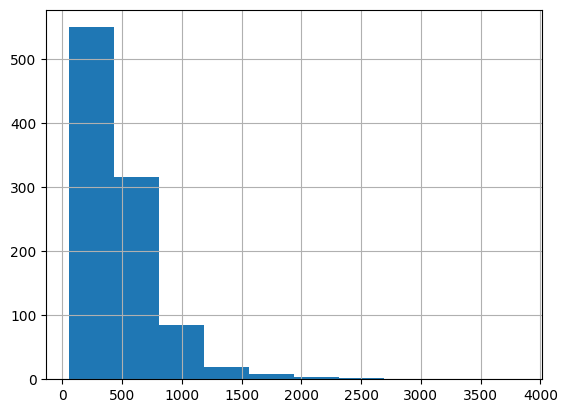

In [25]:
# No of characters present in each sentence
df['document'].str.len().hist()

#Below figure shows the documents range from 50 characters to 3000 characters and generally from 50-600

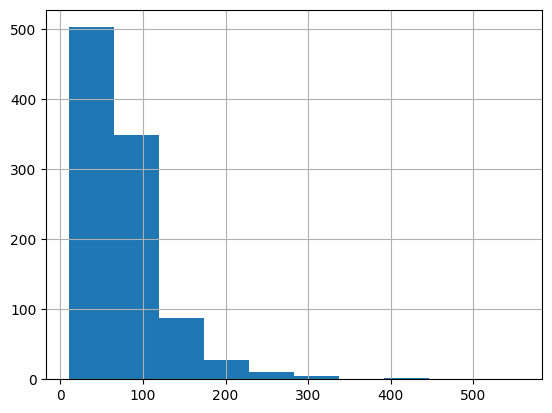

In [27]:
# Word Number Histogram
def plot_word_number_histogram(text):
    text.str.split().\
        map(lambda x: len(x)).\
        hist()
plot_word_number_histogram(df['document'])

#No of words ranges from 10 till 420 and generally ranges from 20-100.

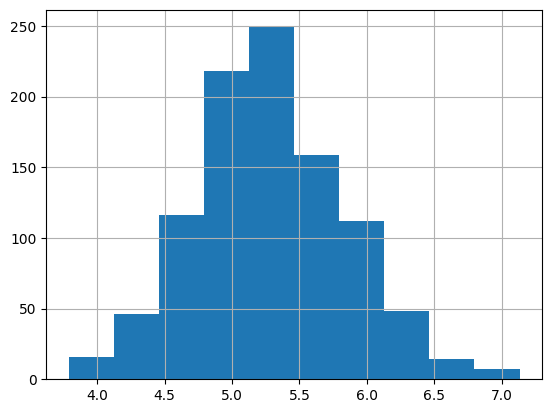

In [30]:
#Average word length in each document
def plot_word_length_histogram(text):
    text.str.split().\
        apply(lambda x : [len(i) for i in x]). \
        map(lambda x: np.mean(x)).\
        hist()
plot_word_length_histogram(df['document'])

In [37]:
def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

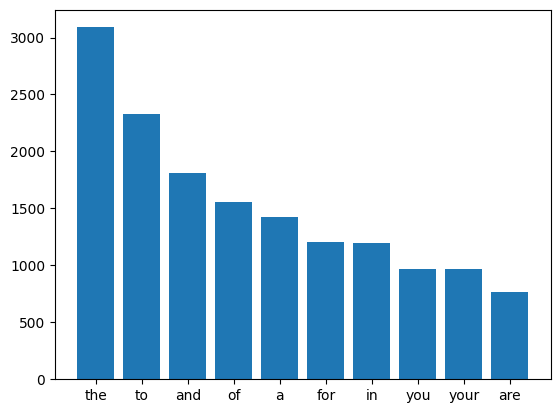

In [38]:
plot_top_stopwords_barchart(df['document'])
#the,to and and dominates the stop words

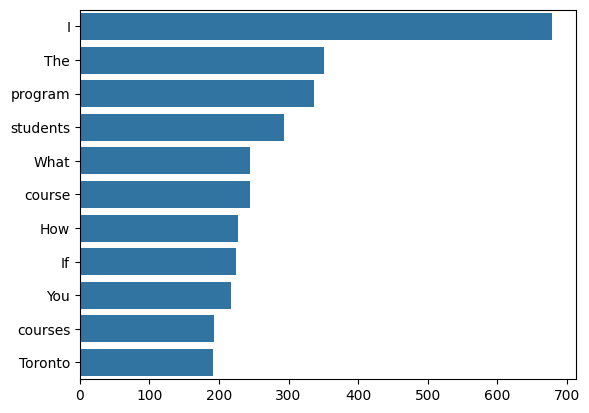

In [40]:
def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

plot_top_non_stopwords_barchart(df['document'])

### Ngrams

In [44]:
def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)

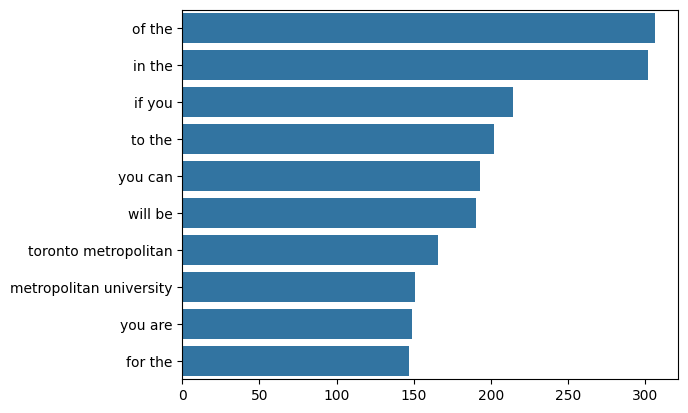

In [45]:
plot_top_ngrams_barchart(df['document'],2)

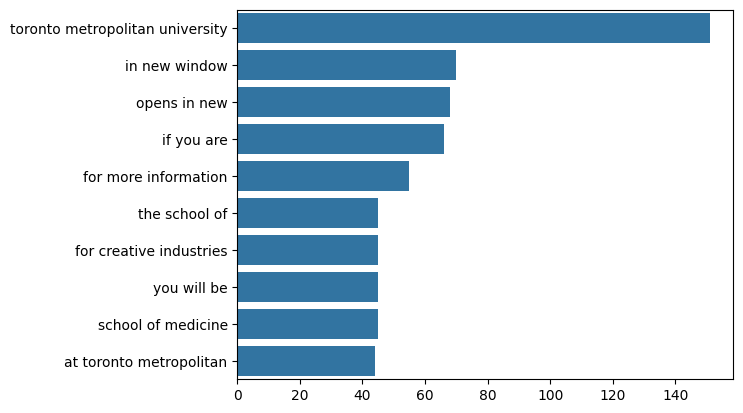

In [47]:
plot_top_ngrams_barchart(df['document'],3)

### Wordcloud

In [54]:
## Word Cloud
def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=50,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rosha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


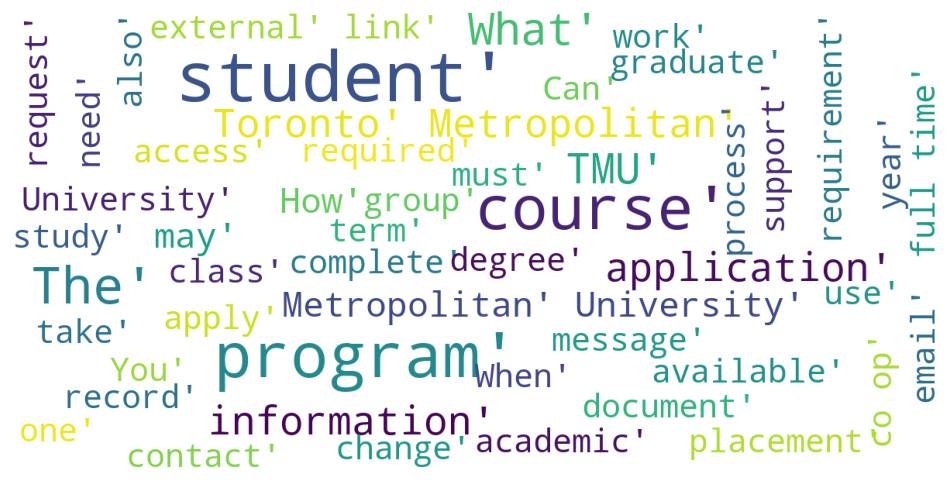

In [55]:
plot_wordcloud(df['document'])

### Named Entities

In [ ]:
!python -m spacy download en_core_web_sm

In [60]:
nlp =  spacy.load('en_core_web_sm')

In [62]:

#Top Named Entities
def plot_named_entity_barchart(text,nlp):
    
    
    def _get_ner(text):
        doc=nlp(text)
        return [X.label_ for X in doc.ents]
    
    ent=text.apply(lambda x : _get_ner(x))
    ent=[x for sub in ent for x in sub]
    counter=Counter(ent)
    count=counter.most_common()
    
    x,y=map(list,zip(*count))
    sns.barplot(x=y,y=x)

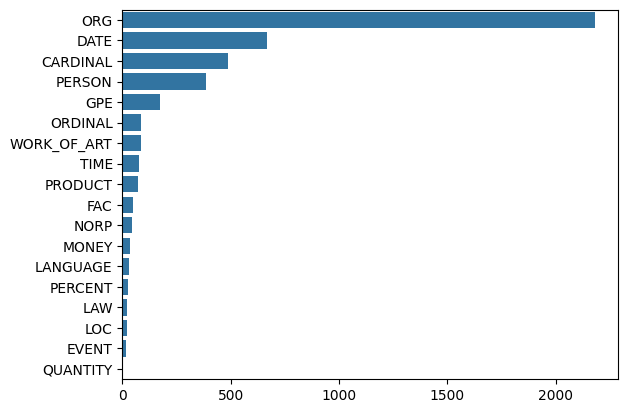

In [63]:
plot_named_entity_barchart(df['document'],nlp)

In [65]:
def plot_most_common_named_entity_barchart(text,nlp, entity="PERSON",):
    
    def _get_ner(text,ent):
        doc=nlp(text)
        return [X.text for X in doc.ents if X.label_ == ent]

    entity_filtered=text.apply(lambda x: _get_ner(x,entity))
    entity_filtered=[i for x in entity_filtered for i in x]
    
    counter=Counter(entity_filtered)
    x,y=map(list,zip(*counter.most_common(10)))
    sns.barplot(x=y,y=x).set_title(entity)

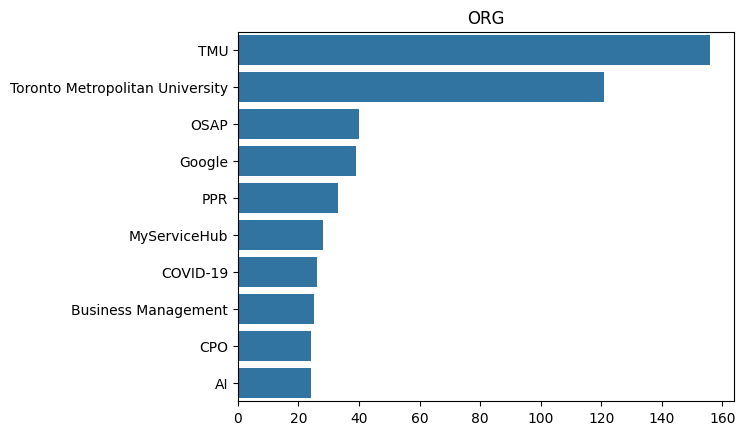

In [67]:
plot_most_common_named_entity_barchart(df['document'],nlp, entity="ORG")

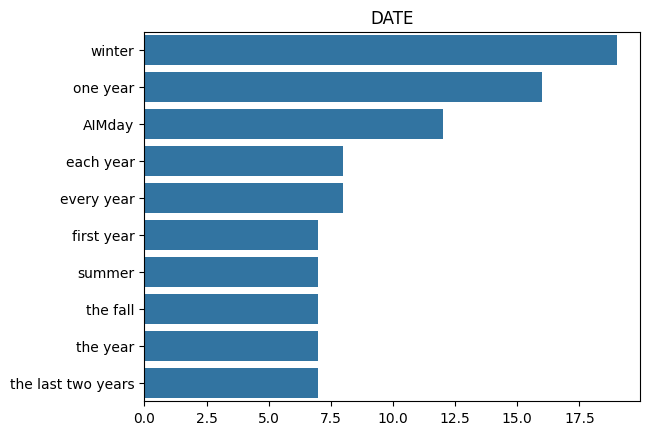

In [70]:
plot_most_common_named_entity_barchart(df['document'],nlp, entity="DATE")

### POS Tagging

In [71]:


def plot_parts_of_speach_barchart(text):
    nltk.download('averaged_perceptron_tagger')

    def _get_pos(text):
        pos=nltk.pos_tag(word_tokenize(text))
        pos=list(map(list,zip(*pos)))[1]
        return pos
    
    tags=text.apply(lambda x : _get_pos(x))
    tags=[x for l in tags for x in l]
    counter=Counter(tags)
    x,y=list(map(list,zip(*counter.most_common(7))))
    
    sns.barplot(x=y,y=x)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rosha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


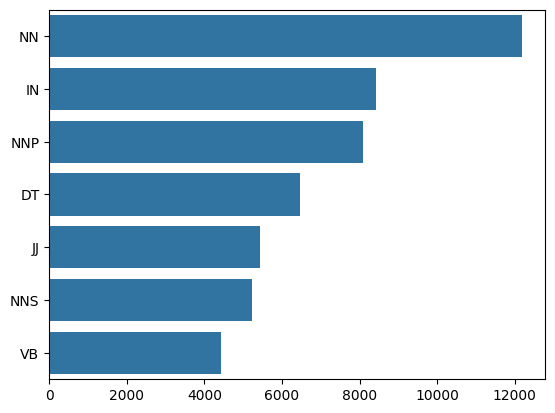

In [72]:

plot_parts_of_speach_barchart(df['document'])

In [73]:
def plot_most_common_part_of_speach_barchart(text, part_of_speach='NN'):
    nltk.download('averaged_perceptron_tagger')
    
    def _filter_pos(text):
        pos_type=[]
        pos=nltk.pos_tag(word_tokenize(text))
        for word,tag in pos:
            if tag==part_of_speach:
                pos_type.append(word)
        return pos_type


    words=text.apply(lambda x : _filter_pos(x))
    words=[x for l in words for x in l]
    counter=Counter(words)
    x,y=list(map(list,zip(*counter.most_common(7))))
    sns.barplot(x=y,y=x).set_title(part_of_speach)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\rosha\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


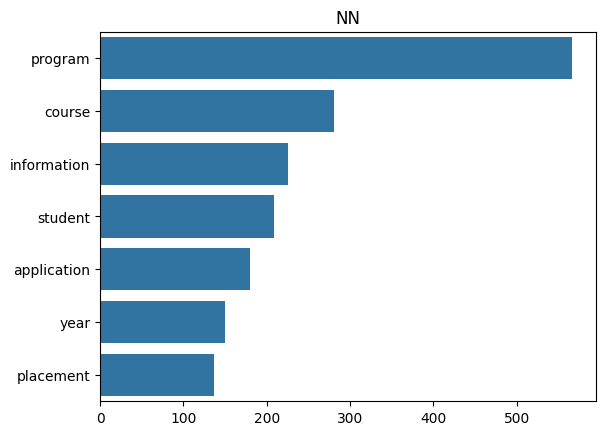

In [75]:
plot_most_common_part_of_speach_barchart(df['document'],part_of_speach='NN')